In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot
from IPython.display import clear_output

In [2]:
X = pd.read_pickle('data/dataset.pkl')
# devide all return by 100 remove percentage sign
X[['ab_capm', 'ab_ff3', 'ab_ff5', 'ex_return']] = X[['ab_capm', 'ab_ff3', 'ab_ff5', 'ex_return']].div(100)
# sign the variables
X[['STreversal', 'Size', 'IdioVol3F', 'IdioRisk', 'PRC', 'BetaFP', 'Beta', 'RoE', 'High52']] = X[['STreversal', 'Size', 'IdioVol3F', 'IdioRisk', 'PRC', 'BetaFP', 'Beta', 'RoE', 'High52']].div(-1)
# format date
X['year_month'] = X['year_month'].astype(str)
X['year_month'] = pd.to_datetime(X['year_month'], format='%Y-%m')

In [3]:
# these 4 variables can not be cut into deciles
['ShareIss1Y', 'ShareRepurchase', 'DelFINL', 'DelLTI']

['ShareIss1Y', 'ShareRepurchase', 'DelFINL', 'DelLTI']

In [4]:
# define a function to build univariate long-short portfolios 
def univariate_long_short(data=None, return_='ab_capm'):
  # long-short portfolios
  long_short = pd.DataFrame()

  variable = ['InvestPPEInv', 'DelCOA', 'dNoa', 'GrLTNOA', 'IntMom', 'LRreversal', 'Mom12m', 'Mom6m', 'MRreversal', 'ResidualMomentum', 'STreversal', 'AM', 'BMdec', 'ChEQ', 'AssetGrowth', 'ChNWC', 'DelEqu', 'NOA', 'Size', 'SP', 'AbnormalAccruals', 'Accruals', 'PctAcc', 'OPLeverage', 'BookLeverage', 'CF', 'cfp', 'DelCOL', 'IdioRisk', 'IdioVol3F', 'Leverage', 'Beta', 'BetaFP', 'BidAskSpread', 'DolVol', 'Illiquidity', 'PRC', 'VolMkt', 'VolSD', 'High52', 'MaxRet', 'CashProd', 'GP', 'roaq', 'RoE']
  
  # full sample 
  for var in variable:
    # based on each variable sort stock into deciles
    data['portfolios_'] = data.groupby('year_month')[var].transform(lambda g: pd.qcut(g, q=10, labels=list(f'Deciles_{i}' for i in range(1,11))))
    # build long-short portfolios each month
    Y = data.groupby(['year_month', 'portfolios_'])[return_].mean().reset_index()
    long = Y[Y['portfolios_']=='Deciles_10']
    short = Y[Y['portfolios_']=='Deciles_1']    
    long_short.index = long['year_month']
    long_short[var] = long[return_].values.reshape(-1,1) - short[return_].values.reshape(-1,1)
    long_short.loc['mean'] = long_short.mean()
    long_short.sort_values(long_short.last_valid_index(), axis=1, ascending=False, inplace=True)
    long_short.drop('mean', axis=0, inplace=True)

  long_short_cum = long_short.cumsum() 
   
  return long_short, long_short_cum

In [5]:
capm_long_short, ab_capm_long_short_cum = univariate_long_short(data=X, return_='ab_capm')
ff3_long_short, ff3_long_short_cum = univariate_long_short(data=X, return_='ab_ff3')
ff5_long_short, ff5_long_short_cum = univariate_long_short(data=X, return_='ab_ff5')
ex_long_short, ex_long_short_cum = univariate_long_short(data=X, return_='ex_return')

/var/folders/_j/dw2kb35j0ds2hc0km23ypls40000gn/T/ipykernel_21480/4137219814.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Y = data.groupby(['year_month', 'portfolios_'])[return_].mean().reset_index()
/var/folders/_j/dw2kb35j0ds2hc0km23ypls40000gn/T/ipykernel_21480/4137219814.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Y = data.groupby(['year_month', 'portfolios_'])[return_].mean().reset_index()
/var/folders/_j/dw2kb35j0ds2hc0km23ypls40000gn/T/ipykernel_21480/4137219814.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. P

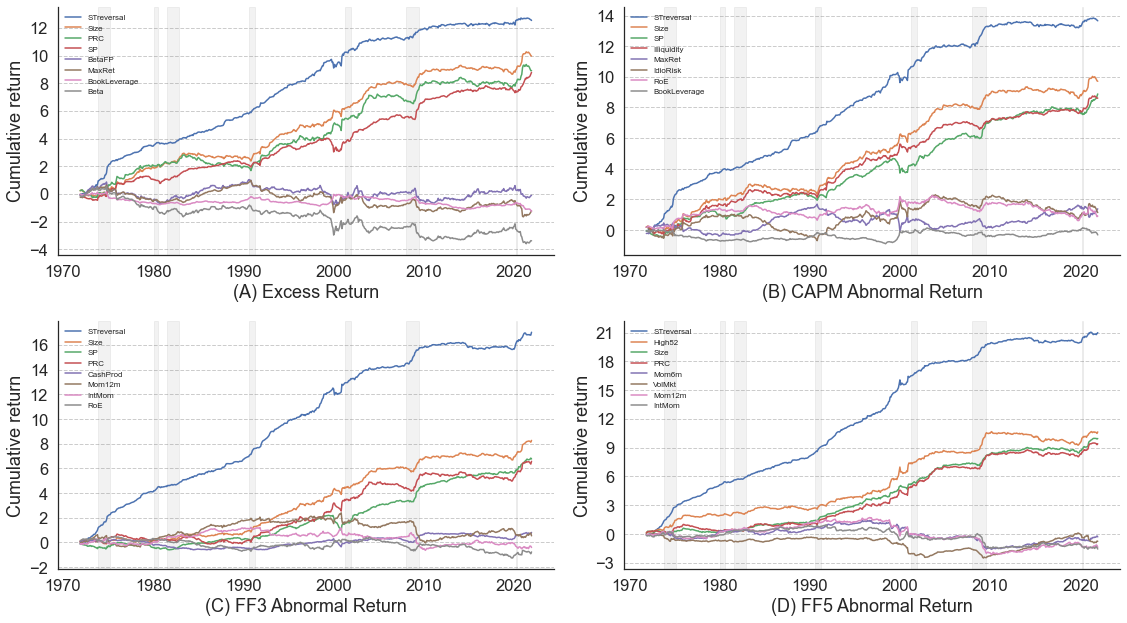

In [7]:
sns.set_theme(font_scale=1.5, style='white')
fig, axes = pyplot.subplots(2,2,figsize=(16, 9))

tidy1 = pd.DataFrame()
tidy1 = pd.concat([tidy1, ex_long_short_cum.iloc[:, :4]], axis=1)  # Selects the first 4 columns
tidy1 = pd.concat([tidy1, ex_long_short_cum.iloc[:, -4:]], axis=1)
tidy1 = tidy1.reset_index().melt(id_vars='year_month').rename(columns=str.title)
sns.lineplot(data=tidy1, x='Year_Month', y='Value', hue='Variable', ax=axes[0, 0])

tidy2 = pd.DataFrame()
tidy2 = pd.concat([tidy2, ab_capm_long_short_cum.iloc[:, :4]], axis=1)  # Selects the first 4 columns
tidy2 = pd.concat([tidy2, ab_capm_long_short_cum.iloc[:, -4:]], axis=1)
tidy2 = tidy2.reset_index().melt(id_vars='year_month').rename(columns=str.title)
sns.lineplot(data=tidy2, x='Year_Month', y='Value', hue='Variable', ax=axes[0, 1])

tidy3 = pd.DataFrame()
tidy3 = pd.concat([tidy3, ff3_long_short_cum.iloc[:, :4]], axis=1)  # Selects the first 4 columns
tidy3 = pd.concat([tidy3, ff3_long_short_cum.iloc[:, -4:]], axis=1)
tidy3 = tidy3.reset_index().melt(id_vars='year_month').rename(columns=str.title)
sns.lineplot(data=tidy3, x='Year_Month', y='Value', hue='Variable', ax=axes[1, 0])

tidy4 = pd.DataFrame()
tidy4 = pd.concat([tidy4, ff5_long_short_cum.iloc[:, :4]], axis=1)  # Selects the first 4 columns
tidy4 = pd.concat([tidy4, ff5_long_short_cum.iloc[:, -4:]], axis=1)
tidy4 = tidy4.reset_index().melt(id_vars='year_month').rename(columns=str.title)
sns.lineplot(data=tidy4, x='Year_Month', y='Value', hue='Variable', ax=axes[1, 1])

for a in range(0,2):
  for b in range(0,2):
    # hide legend title
    handles, labels = axes[a][b].get_legend_handles_labels()
    axes[a][b].legend(handles=handles[0:], labels=labels[0:], loc='upper left', frameon=False, fontsize='8')
    axes[a][b].grid(axis='y', linestyle='--')
    
axes[0][0].set(xlabel='(A) Excess Return', ylabel='Cumulative return', )
axes[0][1].set(xlabel='(B) CAPM Abnormal Return', ylabel='Cumulative return', )
axes[1][0].set(xlabel='(C) FF3 Abnormal Return', ylabel='Cumulative return', )
axes[1][1].set(xlabel='(D) FF5 Abnormal Return', ylabel='Cumulative return', )

import matplotlib.ticker as ticker
axes[0][0].yaxis.set_major_locator(ticker.MultipleLocator(2))
axes[0][1].yaxis.set_major_locator(ticker.MultipleLocator(2))
axes[1][0].yaxis.set_major_locator(ticker.MultipleLocator(2))
axes[1][1].yaxis.set_major_locator(ticker.MultipleLocator(3))

# load nber recession data
nber = pd.read_excel('data/raw_data/NBER_recession.xlsx')
nber['Peak'] = pd.PeriodIndex(nber.Peak, freq='M')
nber = nber[nber.Peak > '1971-11']
nber['Trough'] = pd.PeriodIndex(nber[' Trough'], freq='M')

# shade recession area
for i in range(1, 8):
 axes[0][0].axvspan(nber['Peak'][i], nber['Trough'][i], alpha=0.1, color='grey')
 axes[0][1].axvspan(nber['Peak'][i], nber['Trough'][i], alpha=0.1, color='grey')
 axes[1][0].axvspan(nber['Peak'][i], nber['Trough'][i], alpha=0.1, color='grey')
 axes[1][1].axvspan(nber['Peak'][i], nber['Trough'][i], alpha=0.1, color='grey')

sns.despine()
pyplot.tight_layout()  # Adjust subplot layout for better spacing

# Specify high resolution (dpi) when saving the figure using Matplotlib's savefig
pyplot.savefig('graphics/uni_ls.png', dpi=300)

In [ ]:
import seaborn as sns
from matplotlib import pyplot
sns.set_theme(font_scale=1.5, style='white')
fig, axes = pyplot.subplots(2,2,figsize=(16,9))

sns.lineplot(x=np.linspace(-1,1,1000), y=np.squeeze(all_hat[3][0]), ax=axes[0,0], label='CFNAI = quantile 10%')
sns.lineplot(x=np.linspace(-1,1,1000), y=np.squeeze(all_hat[3][1]), ax=axes[0,0], label='CFNAI = quantile 30%')
sns.lineplot(x=np.linspace(-1,1,1000), y=np.squeeze(all_hat[3][2]), ax=axes[0,0], label='CFNAI = quantile 50%')
sns.lineplot(x=np.linspace(-1,1,1000), y=np.squeeze(all_hat[3][3]), ax=axes[0,0], label='CFNAI = quantile 70%')
axes[0][0].set_xlabel('(A) Excess Return')
axes[0][0].set_ylabel('Predicted Return')
axes[0][0].legend(loc='upper left')
axes[0][0].grid()

for i in range(0,4):
  sns.lineplot(x=np.linspace(-1,1,1000), y=np.squeeze(all_hat[0][i]), ax=axes[0,1])
axes[0][1].set_ylabel('Predicted Return')
axes[0][1].set_xlabel('(B) CAPM Abnormal Return')
axes[0][1].grid()

for i in range(0,4):
  sns.lineplot(x=np.linspace(-1,1,1000), y=np.squeeze(all_hat[1][i]), ax=axes[1,0])
axes[1][0].set_ylabel('Predicted Return')
axes[1][0].set_xlabel('(C) FF3 Abnormal Return')
axes[1][0].grid()

for i in range(0,4):
  sns.lineplot(x=np.linspace(-1,1,1000), y=np.squeeze(all_hat[2][i]), ax=axes[1,1])
axes[1][1].set_ylabel('Predicted Return')
axes[1][1].set_xlabel('(D) FF5 Abnormal Return')
axes[1][1].grid()

import matplotlib.ticker as ticker
axes[0][0].yaxis.set_major_locator(ticker.MultipleLocator(0.0025))
axes[0][1].yaxis.set_major_locator(ticker.MultipleLocator(0.001))
axes[1][0].yaxis.set_major_locator(ticker.MultipleLocator(0.005))
axes[1][1].yaxis.set_major_locator(ticker.MultipleLocator(0.005))

for a in range(2):
  for b in range(2):
    axes[a][b].yaxis.set_major_locator(ticker.MultipleLocator(0.25))

sns.despine()
pyplot.tight_layout()  # Adjust subplot layout for better spacing

# Specify high resolution (dpi) when saving the figure using Matplotlib's savefig
pyplot.savefig('graphics/interaction2.png', dpi=300)

### Univariate Long Only Portfolios

In [22]:
# define a function to build univariate long-short portfolios 
def univariate_long_only(data=None, return_='ab_capm'):
  # long-short portfolios
  long_only_top = pd.DataFrame()
  long_only_bottom = pd.DataFrame()
  
  variable = ['InvestPPEInv', 'DelCOA', 'dNoa', 'GrLTNOA', 'IntMom', 'LRreversal', 'Mom12m', 'Mom6m', 'MRreversal', 'ResidualMomentum', 'STreversal', 'AM', 'BMdec', 'ChEQ', 'AssetGrowth', 'ChNWC', 'DelEqu', 'NOA', 'Size', 'SP', 'AbnormalAccruals', 'Accruals', 'PctAcc', 'OPLeverage', 'BookLeverage', 'CF', 'cfp', 'DelCOL', 'IdioRisk', 'IdioVol3F', 'Leverage', 'Beta', 'BetaFP', 'BidAskSpread', 'DolVol', 'Illiquidity', 'PRC', 'VolMkt', 'VolSD', 'High52', 'MaxRet', 'CashProd', 'GP', 'roaq', 'RoE']
  
  # full sample 
  for var in variable:
    # based on each variable sort stock into deciles
    data['portfolios_'] = data.groupby('year_month')[var].transform(lambda g: pd.qcut(g, q=10, labels=list(f'Deciles_{i}' for i in range(1,11))))
    # compute the mean return for each portfolios each month
    Y = data.groupby(['year_month', 'portfolios_'])[return_].mean().reset_index()
    top = Y[Y['portfolios_']=='Deciles_10']
    bottom = Y[Y['portfolios_']=='Deciles_1']
    
    long_only_top.index = top['year_month']
    long_only_top[var] = top[return_].values.reshape(-1,1)
    
    long_only_bottom.index = bottom['year_month']
    long_only_bottom[var] = bottom[return_].values.reshape(-1,1)
    
    long_only_top.loc['mean'] = long_only_top.mean()
    long_only_top.sort_values(long_only_top.last_valid_index(), axis=1, ascending=False, inplace=True)
    long_only_top.drop('mean', axis=0, inplace=True)
    
  long_top_cum = long_only_top.cumsum()
  long_bottom_cum = long_only_bottom.cumsum()
    
  return long_top_cum, long_bottom_cum

In [23]:
capm_long_top_sum, capm_long_bottom_cum = univariate_long_only(data=X, return_='ab_capm')
ff3_long_top_sum, ff3_long_bottom_cum = univariate_long_only(data=X, return_='ab_ff3')
ff5_long_top_sum, ff5_long_bottom_cum = univariate_long_only(data=X, return_='ab_ff5')
ex_long_top_sum, ex_long_bottom_cum = univariate_long_only(data=X, return_='ex_return')

/var/folders/_j/dw2kb35j0ds2hc0km23ypls40000gn/T/ipykernel_14288/1422081294.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Y = data.groupby(['year_month', 'portfolios_'])[return_].mean().reset_index()
/var/folders/_j/dw2kb35j0ds2hc0km23ypls40000gn/T/ipykernel_14288/1422081294.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Y = data.groupby(['year_month', 'portfolios_'])[return_].mean().reset_index()
/var/folders/_j/dw2kb35j0ds2hc0km23ypls40000gn/T/ipykernel_14288/1422081294.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. P

KeyboardInterrupt: 

[Text(0.5, 0, 'Panel (d): Excess Return'), Text(0, 0.5, 'Cumulative return')]

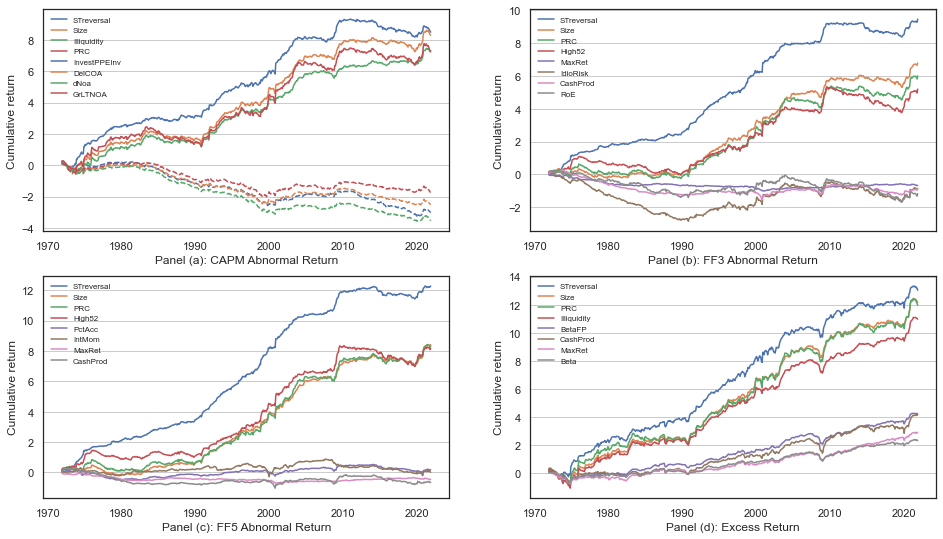

In [11]:
sns.set_theme(font_scale=1, style='white')
fig, axes = pyplot.subplots(2,2,figsize=(16,9))

capm_1 = capm_long_top_sum.iloc[:, :4]  # Selects the first 4 columns
capm_2 = capm_long_bottom_cum.loc[:, capm_long_bottom_cum.columns[0:4].to_list()]

capm_1 = capm_1.reset_index().melt(id_vars='year_month').rename(columns=str.title)
sns.lineplot(data=capm_1, x='Year_Month', y='Value', hue='Variable', ax=axes[0, 0])
capm_2 = capm_2.reset_index().melt(id_vars='year_month').rename(columns=str.title)
sns.lineplot(data=capm_2, x='Year_Month', y='Value', hue='Variable', ax=axes[0, 0], linestyle='--')

tidy2 = pd.DataFrame()
tidy2 = pd.concat([tidy2, ff3_long_top_sum.iloc[:, :4]], axis=1)  # Selects the first 3 columns
tidy2 = pd.concat([tidy2, ff3_long_top_sum.iloc[:, -4:]], axis=1)
tidy2 = tidy2.reset_index().melt(id_vars='year_month').rename(columns=str.title)
sns.lineplot(data=tidy2, x='Year_Month', y='Value', hue='Variable', ax=axes[0, 1])

tidy3 = pd.DataFrame()
tidy3 = pd.concat([tidy3, ff5_long_top_sum.iloc[:, :4]], axis=1)  # Selects the first 3 columns
tidy3 = pd.concat([tidy3, ff5_long_top_sum.iloc[:, -4:]], axis=1)
tidy3 = tidy3.reset_index().melt(id_vars='year_month').rename(columns=str.title)
sns.lineplot(data=tidy3, x='Year_Month', y='Value', hue='Variable', ax=axes[1, 0])

tidy4 = pd.DataFrame()
tidy4 = pd.concat([tidy4, ex_long_top_sum.iloc[:, :4]], axis=1)  # Selects the first 3 columns
tidy4 = pd.concat([tidy4, ex_long_top_sum.iloc[:, -4:]], axis=1)
tidy4 = tidy4.reset_index().melt(id_vars='year_month').rename(columns=str.title)
sns.lineplot(data=tidy4, x='Year_Month', y='Value', hue='Variable', ax=axes[1, 1])

for a in range(0,2):
  for b in range(0,2):
    # hide legend title
    handles, labels = axes[a][b].get_legend_handles_labels()
    axes[a][b].legend(handles=handles[0:], labels=labels[0:], loc='upper left', frameon=False, fontsize='8')
    axes[a][b].grid(axis='y')
    
axes[0][0].set(xlabel='Panel (a): CAPM Abnormal Return', ylabel='Cumulative return', )
axes[0][1].set(xlabel='Panel (b): FF3 Abnormal Return', ylabel='Cumulative return', )
axes[1][0].set(xlabel='Panel (c): FF5 Abnormal Return', ylabel='Cumulative return', )
axes[1][1].set(xlabel='Panel (d): Excess Return', ylabel='Cumulative return', )

## Mean return and sharpe ratio

In [24]:
# define a function to compute mean and sharp ratio for each portfolio
def mean_sr(target='ab_capm', data=X):
  df = pd.DataFrame()
  # full sample
  long_short, _ = univariate_long_short(data=data, return_=target)
  df['mean'] = long_short.mean()
  df['sr'] = long_short.mean()/long_short.std()
  df.sort_values('sr', ascending=False, inplace=True)
  
  # recession period
  data['macro_conditions'] = pd.qcut(data['CFNAI'], 3, labels=False)
  macro_0 = data[data['macro_conditions']==0]
  long_short, _ = univariate_long_short(data=macro_0, return_=target)
  df['mean_recession'] = long_short.mean()
  df['sr_recession'] = long_short.mean()/long_short.std()
  # normal period
  macro_1 = data[data['macro_conditions']==1]
  long_short, _ = univariate_long_short(data=macro_1, return_=target)
  df['mean_normal'] = long_short.mean()
  df['sr_normal'] = long_short.mean()/long_short.std()
  # expansion period
  macro_2 = data[data['macro_conditions']==2]
  long_short, _ = univariate_long_short(data=macro_2, return_=target)
  df['mean_expansion'] = long_short.mean()
  df['sr_expansion'] = long_short.mean()/long_short.std()
  return df

In [25]:
ab_ff5 = mean_sr(target='ab_ff5', data=X)
clear_output()
ab_ff5

,mean,sr,mean_recession,sr_recession,mean_normal,sr_normal,mean_expansion,sr_expansion
STreversal,0.034952,0.484004,0.040848,0.499015,0.028620,0.402705,0.034747,0.559081
Size,0.016579,0.283673,0.016886,0.259800,0.014846,0.283410,0.017823,0.313133
Illiquidity,0.012107,0.237178,0.010399,0.174945,0.011955,0.280732,0.013943,0.284041
DolVol,0.009878,0.223650,0.008216,0.164032,0.009721,0.244505,0.011671,0.279920
High52,0.017721,0.214742,0.024255,0.248674,0.010748,0.136327,0.017454,0.256516
PRC,0.015656,0.213407,0.021672,0.253271,0.010286,0.158280,0.014470,0.216310
SP,0.009026,0.173665,0.011091,0.164850,0.008109,0.194963,0.007791,0.185053
BidAskSpread,0.010608,0.163618,0.012944,0.175273,0.005868,0.102697,0.012523,0.202882
NOA,0.005487,0.159195,0.010114,0.255465,0.002050,0.070376,0.003956,0.119760
VolSD,0.005684,0.158640,0.001611,0.037997,0.009588,0.360932,0.006248,0.175193


In [26]:
ab_ff5.round(3).to_latex('mean_sr.tex', float_format="%.3f")

In [27]:
# define a function to compare mean and sr across of each portfolios in different macroeconomic conditions

def compare_across_macro(data=ab_ff5):
  sr = data[['sr_recession', 'sr_normal', 'sr_expansion']]
  # rank sharpe ratio for each row
  sr1 = sr.rank(axis=1, method='dense').astype(int)
  # count the number ranked in the first, second, and last
  a = ((sr1['sr_recession']==3).sum(), (sr1['sr_normal']==3).sum(), (sr1['sr_expansion']==3).sum())
  b = ((sr1['sr_recession']==2).sum(), (sr1['sr_normal']==2).sum(), (sr1['sr_expansion']==2).sum())
  c = ((sr1['sr_recession']==1).sum(), (sr1['sr_normal']==1).sum(), (sr1['sr_expansion']==1).sum())
  # put into dataframe
  sr2 = pd.DataFrame({'Period': ['Recession','Normal','Expansion'], '1st place': a, '2nd place': b, '3rd place': c})
  # melt for plot
  sr3 = pd.melt(sr2, id_vars='Period', value_vars=['1st place', '2nd place', '3rd place'])
  
  mea = data[['mean_recession', 'mean_normal', 'mean_expansion']]
  # rank mean return for each row
  mea1 = mea.rank(axis=1, method='dense').astype(int)
  # count the number in the first, second, and last
  e = ((mea1['mean_recession']==3).sum(), (mea1['mean_normal']==3).sum(), (mea1['mean_expansion']==3).sum())
  f = ((mea1['mean_recession']==2).sum(), (mea1['mean_normal']==2).sum(), (mea1['mean_expansion']==2).sum())
  g = ((mea1['mean_recession']==1).sum(), (mea1['mean_normal']==1).sum(), (mea1['mean_expansion']==1).sum())
  mea2 = pd.DataFrame({'Period': ['Recession','Normal','Expansion'], '1st place': e, '2nd place': f, '3rd place': g})
  # melt for plot
  mea3 = pd.melt(mea2, id_vars='Period', value_vars=['1st place', '2nd place', '3rd place'])

  return sr3, mea3

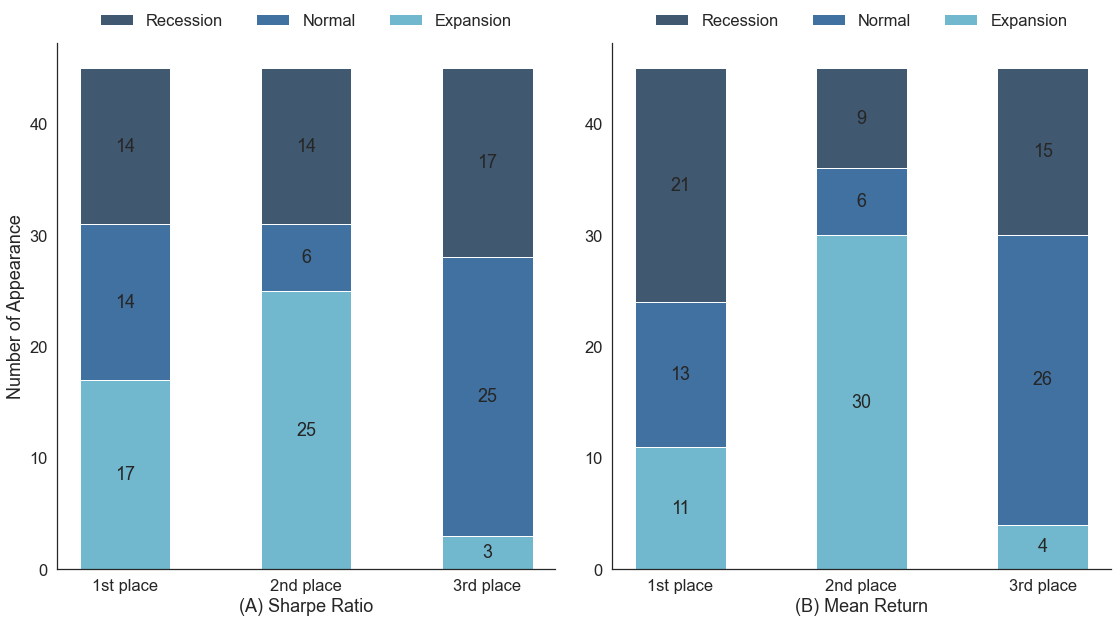

In [28]:
# compare capm abnormal return's mean and sharp ratio in different macroeconomic conditions
capm_sr, capm_mean = compare_across_macro(data=ab_ff5)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(font_scale=1.5, style='white')

fig, ax = plt.subplots(1,2,figsize=(16,9))

sns.histplot(data=capm_sr, x='variable', weights='value', hue='Period', multiple="stack", shrink=0.5, palette='ocean', ax=ax[0])
sns.histplot(data=capm_mean, x='variable', weights='value', hue='Period', multiple="stack", shrink=0.5, palette='ocean', ax=ax[1])

for a in range(0,2):
  sns.move_legend(ax[a], "lower center", bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False)
  for i in ax[a].containers:
    ax[a].bar_label(i, fmt='%d', label_type='center')

ax[0].set_ylabel('Number of Appearance')
ax[1].set_ylabel('')

ax[0].set_xlabel('(A) Sharpe Ratio')
ax[1].set_xlabel('(B) Mean Return')

# remove frame
sns.despine(fig)

pyplot.tight_layout()  # Adjust subplot layout for better spacing

# Specify high resolution (dpi) when saving the figure using Matplotlib's savefig
pyplot.savefig('graphics/uni_ls_compare.png', dpi=300)